In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from utils import resample_ohlcv
from modelling import calculate_theoretical_futures_price
import os
import warnings
from plot import plot_moving_average

# Suppress specific warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
col_dict = {'open_price_col': 'open', 'high_price_col': 'high', 'low_price_col': 'low', 'close_price_col': 'close', 'volume_col': 'volume', 
            'time_col':'datetime', 'expiry_col':'expiry_date', 'expiry_type_col':'expiry_type',
            'oi_col':'open_interest','date_col':'date','div_yield_col':'Div Yield %',
            'rfr_col':'MIBOR'}

In [3]:
data = pd.read_csv('Preprocessed_Inputs/Nifty_Futures_01Jan2020_29Jan25.csv',parse_dates=['datetime','expiry_date'])
data.head(3)

,datetime,expiry_date,stock_code,exchange_code,product_type,right,strike_price,open,high,low,...,P/B,Div Yield %,close_equity,exchange_code_equity,high_equity,low_equity,open_equity,stock_code_equity,volume_equity,time_to_expiry
0,2020-01-01 09:15:00,2020-01-30,NIFTY,NFO,Futures,Others,0,12253.9502,12266.7500,12252.7002,...,NaN,NaN,12215.45,NSE,12216.25,12201.55,12201.55,NIFTY,0.0,0.079452
1,2020-01-01 09:15:00,2020-03-26,NIFTY,NFO,Futures,Others,0,12309.0498,12348.5996,12309.0498,...,NaN,NaN,12215.45,NSE,12216.25,12201.55,12201.55,NIFTY,0.0,0.232877
2,2020-01-01 09:15:00,2020-02-27,NIFTY,NFO,Futures,Others,0,12302.2500,12309.8496,12297.0498,...,NaN,NaN,12215.45,NSE,12216.25,12201.55,12201.55,NIFTY,0.0,0.156164


In [4]:
near_month_data = data[data[col_dict['expiry_type_col']] == 'near']
near_month_data = calculate_theoretical_futures_price(near_month_data,
                                                      [col_dict['open_price_col'], col_dict['close_price_col']], 
                                                      col_dict)

mid_month_data = data[data[col_dict['expiry_type_col']] == 'mid']
mid_month_data = calculate_theoretical_futures_price(mid_month_data,
                                                      [col_dict['open_price_col'], col_dict['close_price_col']], 
                                                      col_dict)
far_month_data = data[data[col_dict['expiry_type_col']] == 'far']
far_month_data = calculate_theoretical_futures_price(far_month_data,
                                                      [col_dict['open_price_col'], col_dict['close_price_col']], 
                                                      col_dict)

c:\Users\Preet Lodaya\Quant\modelling.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[f"{col}_theoretical" for col in price_cols]] = data[price_cols].mul(np.exp((data[col_dict['rfr_col']] - data[col_dict['div_yield_col']])*data['time_to_expiry']),axis=0)
c:\Users\Preet Lodaya\Quant\modelling.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[f"{col}_theoretical" for col in price_cols]] = data[price_cols].mul(np.exp((data[col_dict['rfr_col']] - data[col_dict['div_yield_col']])*data['time_to_

In [5]:

req_cols = [col_dict['time_col'], col_dict['open_price_col'], col_dict['close_price_col'], col_dict['high_price_col'], col_dict['low_price_col'], 
            col_dict['volume_col'], col_dict['oi_col'], col_dict['expiry_col'],
            f"{col_dict['open_price_col']}_theoretical", f"{col_dict['close_price_col']}_theoretical", 
            f"{col_dict['open_price_col']}_price_diff", f"{col_dict['close_price_col']}_price_diff"]

final_data1 = pd.merge(near_month_data, mid_month_data[req_cols], on=col_dict['time_col'], suffixes=('_near', '_mid'), how = 'outer')
final_data = pd.merge(final_data1, far_month_data[req_cols].rename(columns = {c:f"{c}_far" for c in req_cols if c != col_dict['time_col']}), 
                      on=col_dict['time_col'], how = 'outer')
final_data.shape

(471446, 55)

In [8]:
data.sort_values([col_dict['time_col'], col_dict['expiry_col']]).groupby(col_dict['date_col'])[col_dict['expiry_type_col']].unique().value_counts()

expiry_type
[near, mid, far]    1
[near, mid, far]    1
[near, mid, far]    1
[near, mid, far]    1
[near, mid, far]    1
                   ..
[near, mid, far]    1
[near, mid, far]    1
[near, mid, far]    1
[near, mid, far]    1
[near, mid, far]    1
Name: count, Length: 1264, dtype: int64

In [6]:
final_data.shape

(471446, 55)

In [7]:
from Testing import NaiveBacktester

In [ ]:
naive_strat = NaiveBacktester()

In [8]:
final_data.columns

Index(['datetime', 'expiry_date_near', 'stock_code', 'exchange_code',
       'product_type', 'right', 'strike_price', 'open_near', 'high_near',
       'low_near', 'close_near', 'volume_near', 'open_interest_near', 'date',
       'expiry_type', 'MIBOR', 'prev_MIBOR', 'IndexName', 'P/E', 'P/B',
       'Div Yield %', 'close_equity', 'exchange_code_equity', 'high_equity',
       'low_equity', 'open_equity', 'stock_code_equity', 'volume_equity',
       'time_to_expiry', 'open_theoretical_near', 'close_theoretical_near',
       'open_price_diff_near', 'close_price_diff_near', 'open_mid',
       'close_mid', 'high_mid', 'low_mid', 'volume_mid', 'open_interest_mid',
       'expiry_date_mid', 'open_theoretical_mid', 'close_theoretical_mid',
       'open_price_diff_mid', 'close_price_diff_mid', 'open_far', 'close_far',
       'high_far', 'low_far', 'volume_far', 'open_interest_far',
       'expiry_date_far', 'open_theoretical_far', 'close_theoretical_far',
       'open_price_diff_far', 'close_pr

In [8]:
data['futures_id'] = 'FUT_'+ data[col_dict['expiry_col']].astype(str)

avail_instruments = data.groupby(col_dict['date_col'])['futures_id'].unique().reset_index().rename(columns = {'futures_id':'instruments'})
avail_instruments['instruments'] = avail_instruments['instruments'].apply(lambda x : list(x) + ['equity'])
avail_instruments.head(3)

,date,instruments
0,2020-01-01,"[FUT_2020-01-30, FUT_2020-03-26, FUT_2020-02-2..."
1,2020-01-02,"[FUT_2020-02-27, FUT_2020-03-26, FUT_2020-01-3..."
2,2020-01-03,"[FUT_2020-03-26, FUT_2020-02-27, FUT_2020-01-3..."


In [18]:
retrieve_expiry_dates_df = data.copy()
retrieve_expiry_dates_df[col_dict['expiry_col']] = retrieve_expiry_dates_df[col_dict['expiry_col']].astype(str)
retrieve_expiry_dates_df.groupby(col_dict['date_col']).apply(lambda g:g[[col_dict['expiry_col'], col_dict['expiry_type_col']]].drop_duplicates().set_index(col_dict['expiry_type_col']).to_dict()[col_dict['expiry_col']]).to_dict()

C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_8924\1128765908.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  retrieve_expiry_dates_df.groupby(col_dict['date_col']).apply(lambda g:g[[col_dict['expiry_col'], col_dict['expiry_type_col']]].drop_duplicates().set_index(col_dict['expiry_type_col']).to_dict()[col_dict['expiry_col']]).to_dict()


{'2020-01-01': {'near': '2020-01-30',
  'far': '2020-03-26',
  'mid': '2020-02-27'},
 '2020-01-02': {'mid': '2020-02-27',
  'far': '2020-03-26',
  'near': '2020-01-30'},
 '2020-01-03': {'far': '2020-03-26',
  'mid': '2020-02-27',
  'near': '2020-01-30'},
 '2020-01-06': {'far': '2020-03-26',
  'mid': '2020-02-27',
  'near': '2020-01-30'},
 '2020-01-07': {'far': '2020-03-26',
  'near': '2020-01-30',
  'mid': '2020-02-27'},
 '2020-01-08': {'near': '2020-01-30',
  'mid': '2020-02-27',
  'far': '2020-03-26'},
 '2020-01-09': {'mid': '2020-02-27',
  'far': '2020-03-26',
  'near': '2020-01-30'},
 '2020-01-10': {'near': '2020-01-30',
  'mid': '2020-02-27',
  'far': '2020-03-26'},
 '2020-01-13': {'near': '2020-01-30',
  'far': '2020-03-26',
  'mid': '2020-02-27'},
 '2020-01-14': {'far': '2020-03-26',
  'mid': '2020-02-27',
  'near': '2020-01-30'},
 '2020-01-15': {'mid': '2020-02-27',
  'far': '2020-03-26',
  'near': '2020-01-30'},
 '2020-01-16': {'mid': '2020-02-27',
  'near': '2020-01-30',
  'f

In [ ]:
final_data = pd.merge(final_data,avail_instruments, on = col_dict['date_col'], how = 'left')


Correlation: 0.0018698410240304336
P-value: 0.32382602788331943


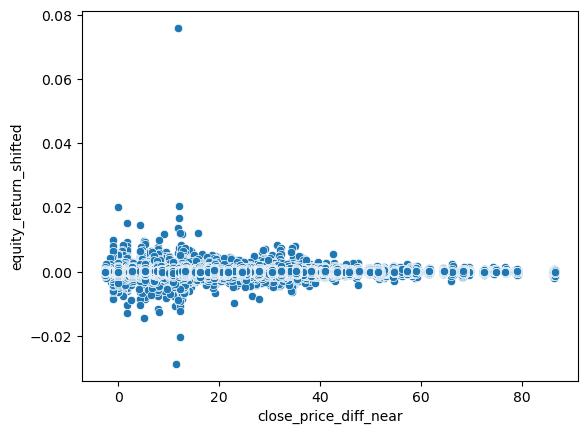

In [62]:
import scipy.stats as stats


col1 = f"{col_dict['close_price_col']}_price_diff_near"
col2 = 'equity_return_shifted'
plot_df = final_data.copy()
plot_df['equity_return_shifted'] = plot_df['intraday_returns'].shift(1)
plot_df.dropna(subset=[col1,col2],inplace=True)
sns.scatterplot(plot_df, x= f"{col_dict['close_price_col']}_price_diff_near", y = "equity_return_shifted" )
correlation, p_value = stats.pearsonr(plot_df[f"{col_dict['close_price_col']}_price_diff_near"], 
                                      plot_df['equity_return_shifted'])

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

<Axes: xlabel='month', ylabel='close_price_diff_near'>

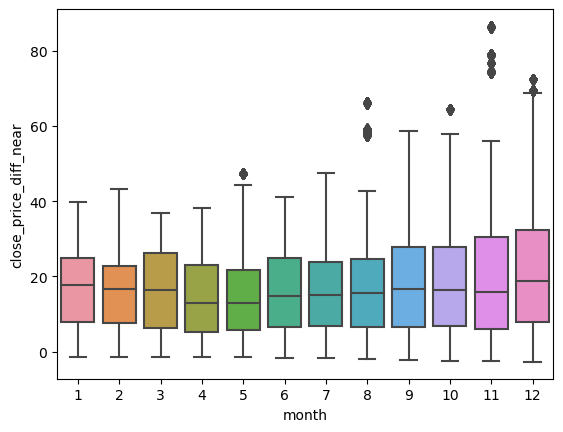

In [63]:
import scipy.stats as stats


col1 = f"{col_dict['close_price_col']}_price_diff_near"
col2 = 'month'
plot_df = final_data.copy()
plot_df['month'] = plot_df[col_dict['time_col']].dt.month
plot_df.dropna(subset=[col1,col2],inplace=True)
sns.boxplot(plot_df, x=col2, y = col1 )
# correlation, p_value = stats.pearsonr(plot_df[f"{col_dict['close_price_col']}_price_diff_near"], 
#                                       plot_df['equity_return_shifted'])

# print(f"Correlation: {correlation}")
# print(f"P-value: {p_value}")

Estimating realized interest rate from data

ln(Ft/Ft-1) = alpha0X*ln(St/St-1)* + alpha1X*(RFFt - RFFt-1)* + alpha2X*div_yield* + alpha3X*RFF*X*time* + alpha4*div_yield*X*time* 

(array([17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

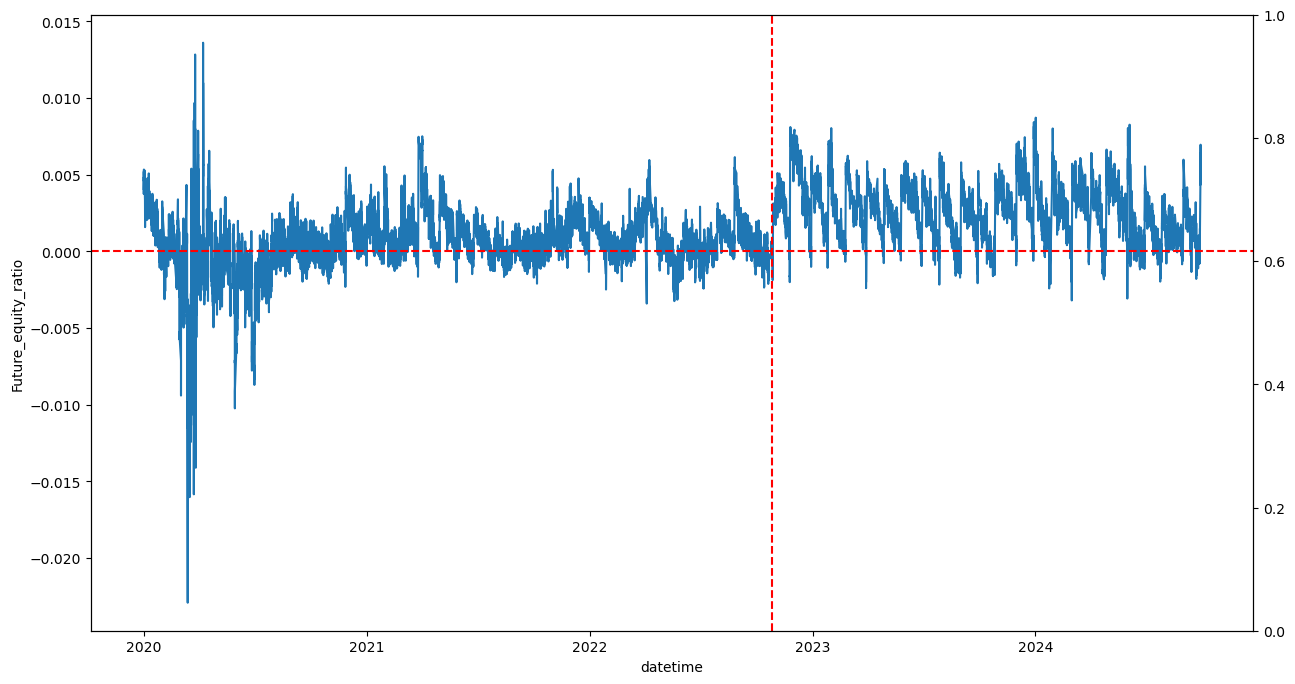

In [116]:
import datetime
# plt.figure(figsize=(15,8))
fig, ax1 = plt.subplots(figsize=(15, 8))
plot_df = final_data.copy()
# plot_df['Future_equity_ratio'] = plot_df['close_near']/plot_df['close_equity']
plot_df['Future_equity_ratio'] = np.log(plot_df['close_near']/plot_df['close_equity'])
# plot_df['Future_th_equity_ratio'] = plot_df['close_theoretical_near']/plot_df['close_equity']
# plot_df['Future_equity_ratio_change'] = 100*(plot_df['Future_equity_ratio']/plot_df['Future_equity_ratio'].shift(1) - 1).abs()
plot_df['time'] = plot_df[col_dict['time_col']].dt.time.astype(str)
# # sns.boxplot(data = plot_df.loc[(plot_df['datetime'].dt.time < datetime.time(11,0))&
# #                                (plot_df['datetime'].dt.time != datetime.time(9,15))
# #                                ], x = 'time', y = 'Future_equity_ratio_change')
sns.lineplot(plot_df, x = col_dict['time_col'], y = 'Future_equity_ratio', ax=ax1)
# sns.lineplot(plot_df, x = col_dict['time_col'], y = 'Future_th_equity_ratio', ax=ax1)
ax2 = ax1.twinx()
# sns.lineplot(plot_df, x = col_dict['time_col'], y = f"{col_dict['oi_col']}_near", ax=ax2, color = 'r')
ax1.axhline(y=0, color='r', linestyle='--')
ax1.axvline(x=pd.to_datetime("2022-10-27"), color='r', linestyle='--')
plt.xticks(rotation =45)

In [88]:
plot_df.loc[plot_df['Future_equity_ratio']<1][[col_dict['time_col'], 'expiry_date_near', col_dict['rfr_col'], 
                                              f"{col_dict['close_price_col']}_near",f"{col_dict['close_price_col']}_equity",
                                              f"{col_dict['close_price_col']}_theoretical_near"]][col_dict['time_col']].dt.day_of_week.value_counts()#.head(50)

datetime
3    26046
2    20015
0    19052
1    17244
4    17179
Name: count, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]),
 [Text(0, 0, '09:15:00'),
  Text(1, 0, '09:16:00'),
  Text(2, 0, '09:17:00'),
  Text(3, 0, '09:18:00'),
  Text(4, 0, '09:19:00'),
  Text(5, 0, '09:20:00'),
  Text(6, 0, '09:21:00'),
  Text(7, 0, '09:22:00'),
  Text(8, 0, '09:23:00'),
  Text(9, 0, '09:24:00'),
  Text(10, 0, '09:25:00'),
  Text(11, 0, '09:26:00'),
  Text(12, 0, '09:27:00'),
  Text(13, 0, '09:28:00'),
  Text(14, 0, '09:29:00'),
  Text

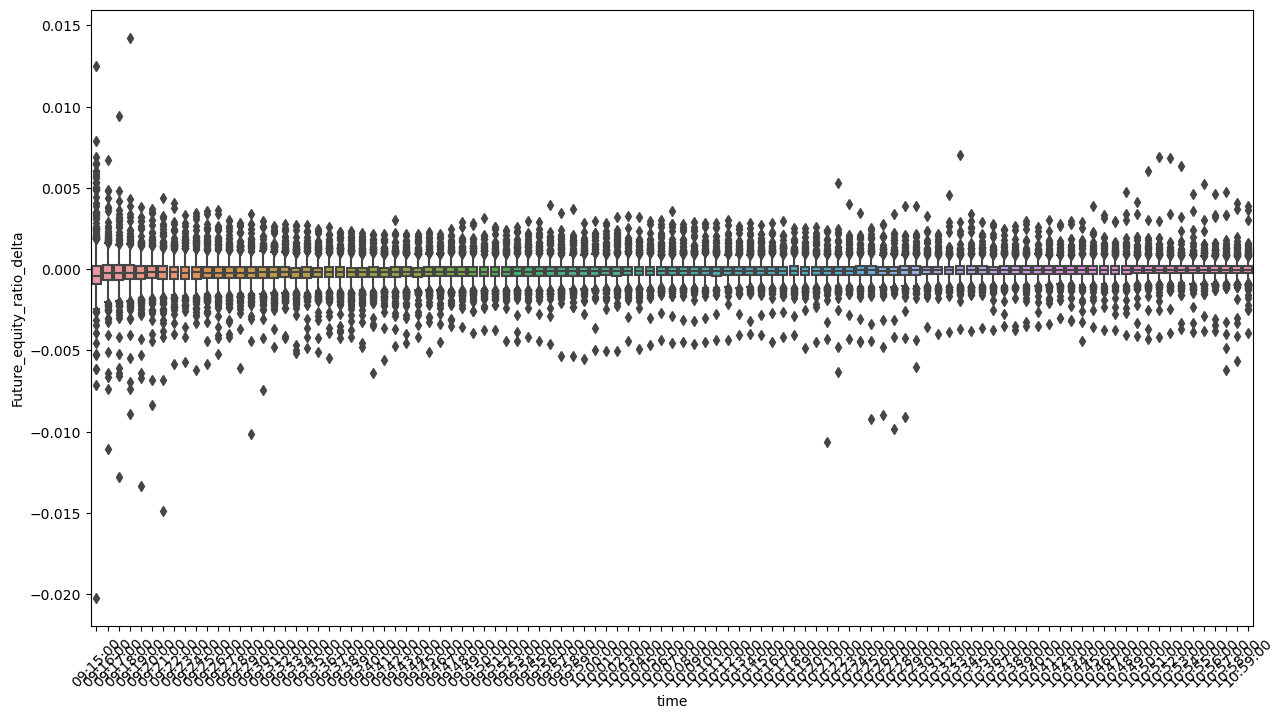

In [136]:
plot_df['post_regime_shift'] = 0
plot_df.loc[pd.to_datetime(plot_df[col_dict['date_col']])>pd.to_datetime('2022-10-27'),'post_regime_shift'] = 1
plt.figure(figsize=(15,8))
avg_fe_ratio = plot_df.groupby([col_dict['date_col']])['Future_equity_ratio'].mean().to_frame().reset_index()
rfr_change_df = pd.merge(plot_df[[col_dict['date_col'], col_dict['time_col'],'time','post_regime_shift', 'Future_equity_ratio']], 
                         avg_fe_ratio.rename(columns = {'Future_equity_ratio':'Future_equity_ratio_daily_avg'}), on = col_dict['date_col'], how ='left')
rfr_change_df['Future_equity_ratio_daily_avg_lag'] = rfr_change_df['Future_equity_ratio_daily_avg'].shift(1)
rfr_change_df['Future_equity_ratio_delta'] = (rfr_change_df['Future_equity_ratio'] - rfr_change_df['Future_equity_ratio_daily_avg_lag'])#.abs()
# rfr_change_df['time'] = rfr_change_df[col_dict['time_col']].dt.time.astype(str)
sns.boxplot(data = rfr_change_df.loc[(rfr_change_df['datetime'].dt.time < datetime.time(11,0))
                            #    (plot_df['datetime'].dt.time != datetime.time(9,15))
                               ], x = 'time', y = 'Future_equity_ratio_delta')
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

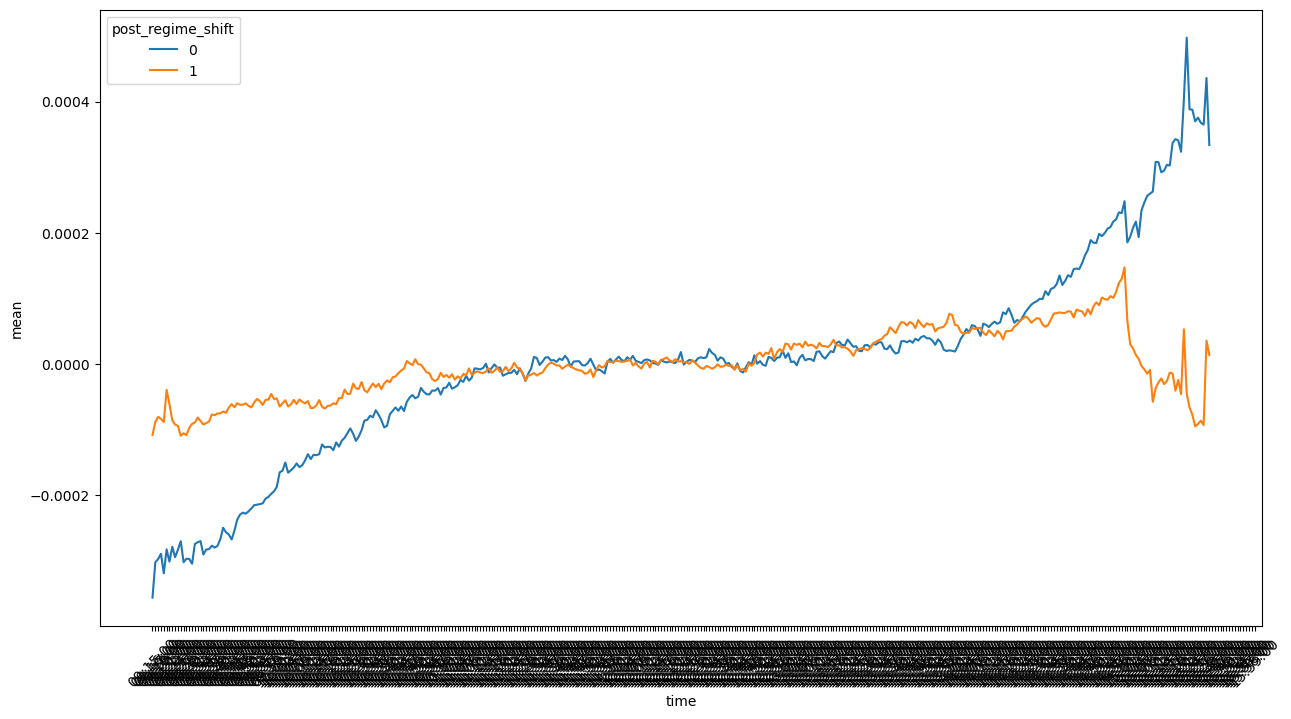

In [152]:
plt.figure(figsize=(15,8))
sns.lineplot(rfr_change_df.loc[rfr_change_df[col_dict['time_col']].dt.time < datetime.time(16,0)].groupby(['time','post_regime_shift'],as_index=False)['Future_equity_ratio_delta'].describe(),
             x = 'time',y = 'mean', hue = 'post_regime_shift')
plt.xticks(rotation = 45)

RangeIndex(start=0, stop=751, step=1)
Index(['09:15:00', '09:15:00', '09:16:00', '09:16:00', '09:17:00', '09:17:00',
       '09:18:00', '09:18:00', '09:19:00', '09:19:00',
       ...
       '15:25:00', '15:25:00', '15:26:00', '15:26:00', '15:27:00', '15:27:00',
       '15:28:00', '15:28:00', '15:29:00', '15:29:00'],
      dtype='object', name='time', length=750)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_32540\849325712.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['moving_avg'] = category_df[plot_col_name].rolling(window=window).mean()
C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_32540\849325712.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['moving_avg'] = category_df[plot_col_name].rolling(window=window).mean()


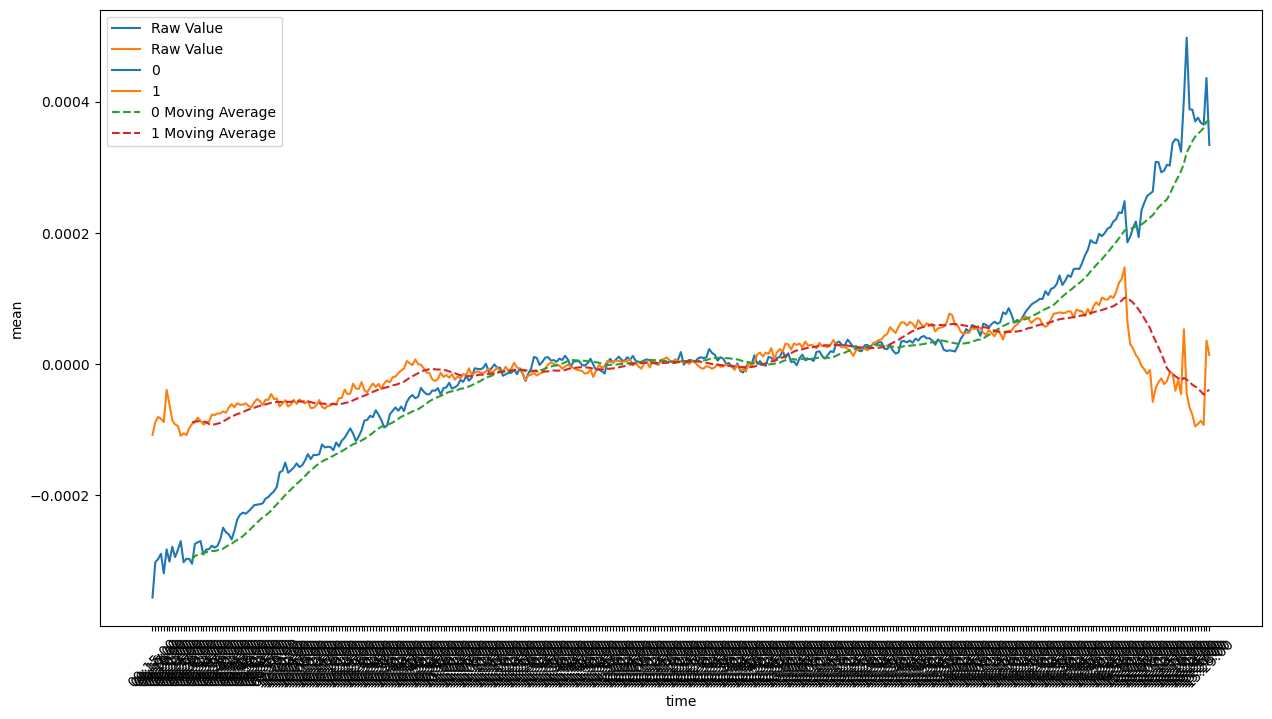

In [168]:
rfr_change_mean_df = rfr_change_df.loc[rfr_change_df[col_dict['time_col']].dt.time <= datetime.time(15,30)].groupby(['time','post_regime_shift'],as_index=False)['Future_equity_ratio_delta'].describe()
plot_moving_average(rfr_change_mean_df,col_dict, plot_col_name='mean',
                    window = 15, time_col = 'time', hue = 'post_regime_shift')

In [166]:
rfr_change_mean_df.tail(5)

,time,post_regime_shift,count,mean,std,min,25%,50%,75%,max
746,15:28:00,0,692.0,0.000436,0.000886,-0.004734,-0.000005,0.000418,0.000838,0.006495
747,15:28:00,1,472.0,0.000035,0.000735,-0.003008,-0.000401,0.000019,0.000477,0.002391
748,15:29:00,0,692.0,0.000334,0.000918,-0.005301,-0.000106,0.000348,0.000771,0.005371
749,15:29:00,1,472.0,0.000014,0.000755,-0.003774,-0.000388,-0.000022,0.000476,0.002517
750,15:30:00,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

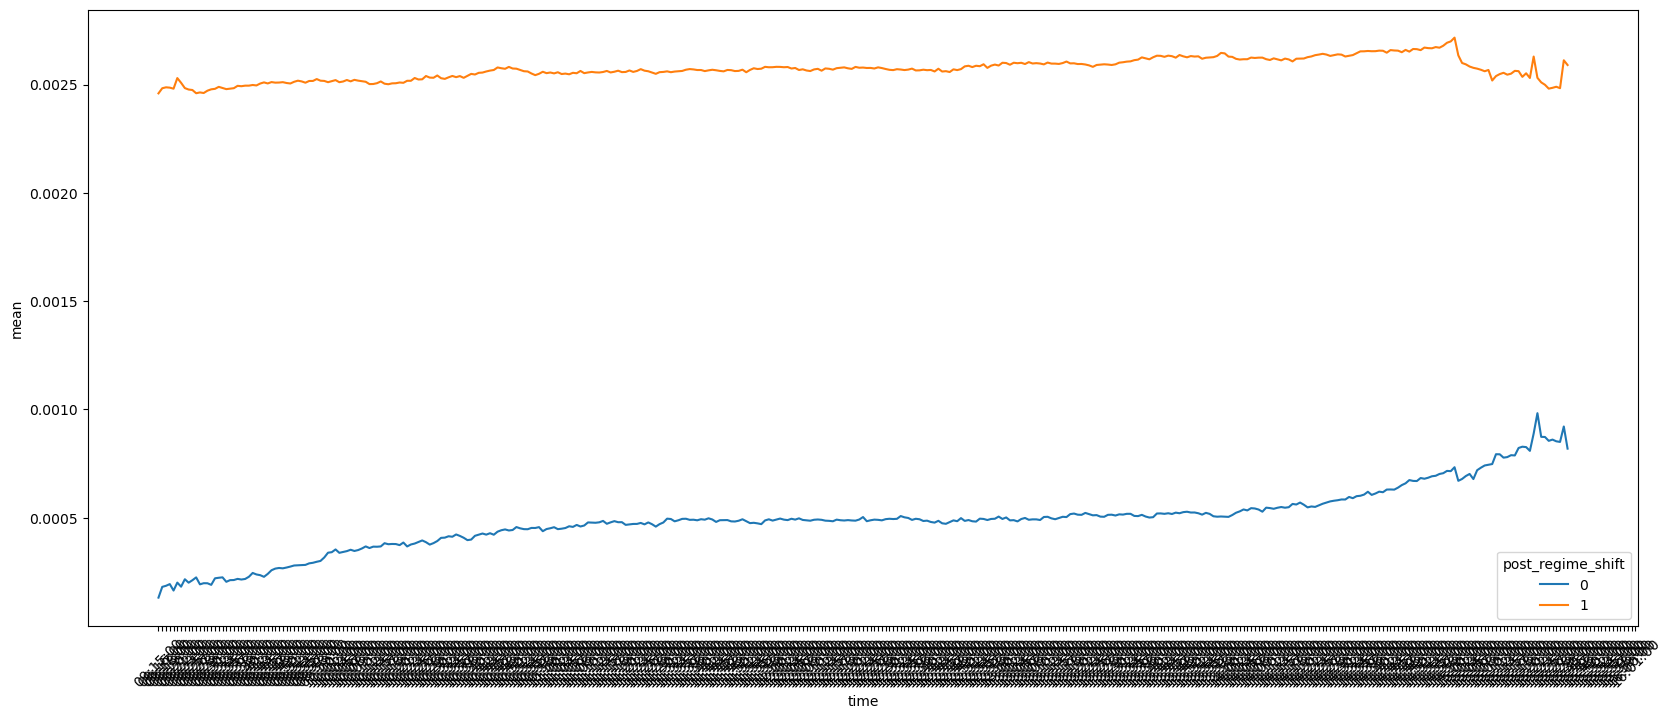

In [135]:
plt.figure(figsize=(20,8))
sns.lineplot(plot_df.groupby(['time','post_regime_shift'], as_index=False)['Future_equity_ratio'].describe(), x = 'time',y = 'mean', hue = 'post_regime_shift')
plt.xticks(rotation = 45)

In [7]:
final_data.columns

Index(['datetime', 'expiry_date_near', 'stock_code', 'exchange_code',
       'product_type', 'right', 'strike_price', 'open_near', 'high_near',
       'low_near', 'close_near', 'volume_near', 'open_interest_near', 'date',
       'expiry_type', 'MIBOR', 'prev_MIBOR', 'IndexName', 'P/E', 'P/B',
       'Div Yield %', 'returns', 'log_returns', 'overnight_returns',
       'overnight_log_returns', 'intraday_returns', 'intraday_log_returns',
       'close_equity', 'high_equity', 'low_equity', 'open_equity',
       'volume_equity', 'returns_equity', 'log_returns_equity',
       'overnight_returns_equity', 'overnight_log_returns_equity',
       'intraday_returns_equity', 'intraday_log_returns_equity',
       'time_to_expiry', 'open_theoretical_near', 'close_theoretical_near',
       'open_price_diff_near', 'close_price_diff_near', 'open_mid',
       'close_mid', 'high_mid', 'low_mid', 'volume_mid', 'open_interest_mid',
       'expiry_date_mid', 'open_theoretical_mid', 'close_theoretical_mid',
 

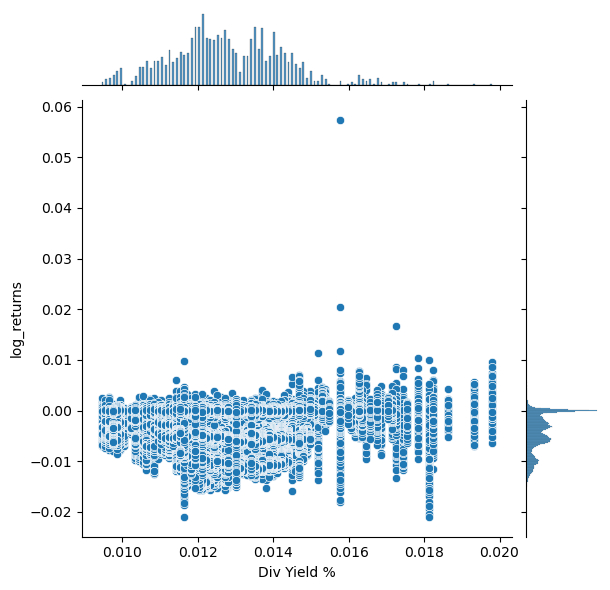

In [10]:
sns.jointplot(final_data, y = 'log_returns', x= col_dict['div_yield_col'])

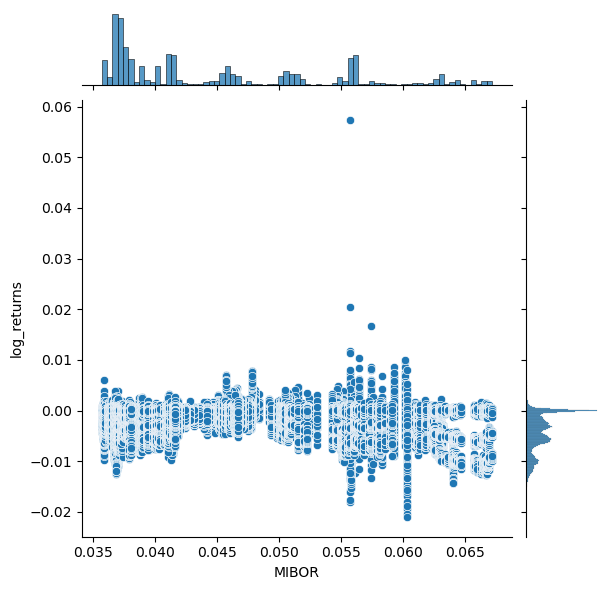

In [11]:
sns.jointplot(final_data, y = 'log_returns', x= col_dict['rfr_col'])

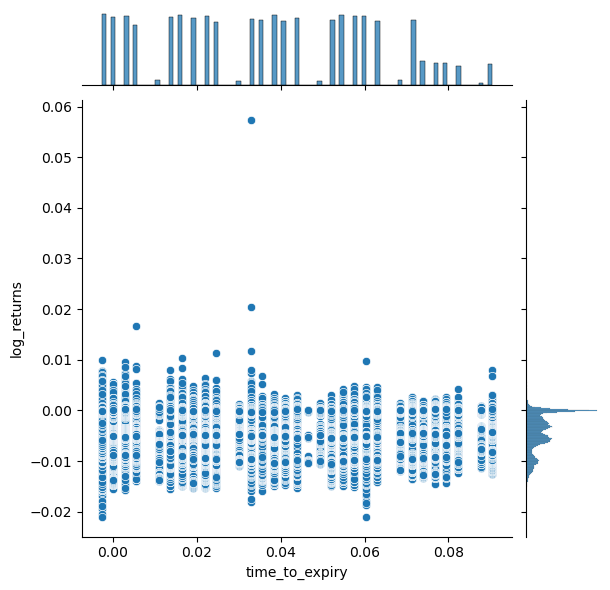

In [12]:
sns.jointplot(final_data, y = 'log_returns', x= 'time_to_expiry')

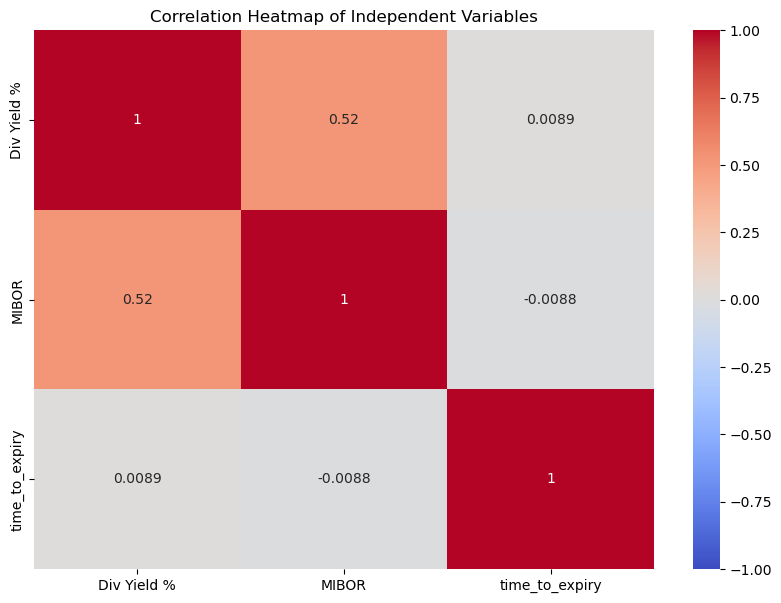

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data_clean is your DataFrame and it contains the necessary columns
# Define the independent variables
independent_vars = final_data_clean[[col_dict['div_yield_col'], col_dict['rfr_col'], 'time_to_expiry']]

# Calculate the correlation matrix
correlation_matrix = independent_vars.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            log_returns   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                 2.308e+04
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:30:50   Log-Likelihood:             1.2843e+06
No. Observations:              277963   AIC:                        -2.569e+06
Df Residuals:                  277959   BIC:                        -2.569e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0066   3.35e-05   -195.

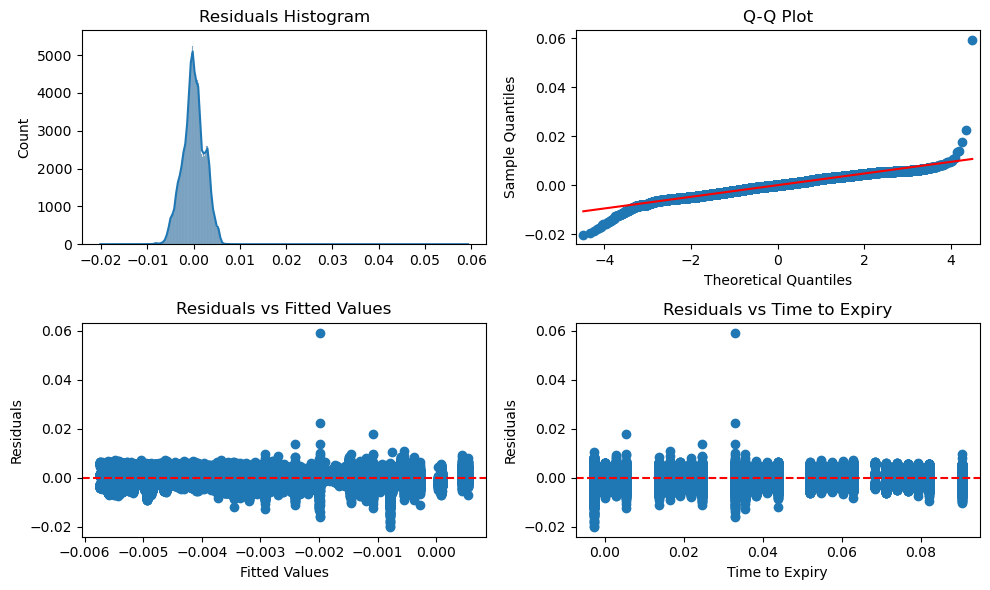

In [90]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson

# Assuming final_data is your DataFrame and it contains the necessary columns
# Drop rows with NaN values in the relevant columns
final_data_clean = final_data.dropna(subset=['log_returns', col_dict['div_yield_col'], 
                                             col_dict['rfr_col'], 'time_to_expiry'])

# Define the independent variables (X) and the dependent variable (y)
X = final_data_clean[[col_dict['div_yield_col'], col_dict['rfr_col'], 'time_to_expiry']]
y = final_data_clean['log_returns']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Conduct residual analysis
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')

plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.subplot(2, 2, 3)
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.subplot(2, 2, 4)
plt.scatter(final_data_clean['time_to_expiry'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time to Expiry')
plt.ylabel('Residuals')
plt.title('Residuals vs Time to Expiry')

plt.tight_layout()
plt.show()

# Conduct goodness of fit tests
# R-squared and Adjusted R-squared are already included in the model summary

# Test for autocorrelation in residuals using Durbin-Watson test
# dw_statistic = durbin_watson(residuals)
# print(f'Durbin-Watson statistic: {dw_statistic}')

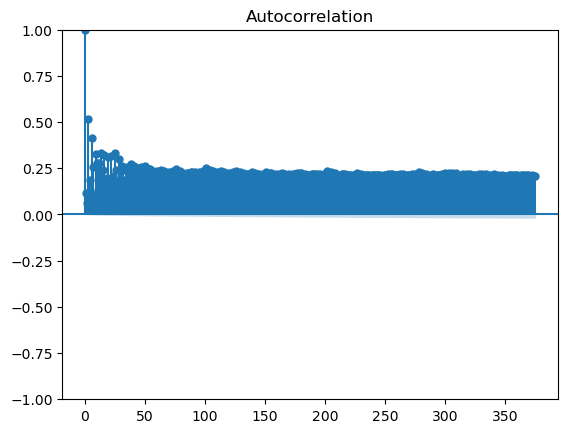

<Figure size 1200x700 with 0 Axes>

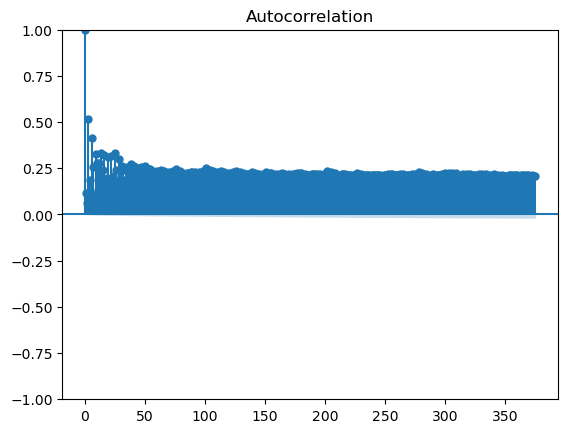

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,7))
plot_acf(model.resid, lags = 375)

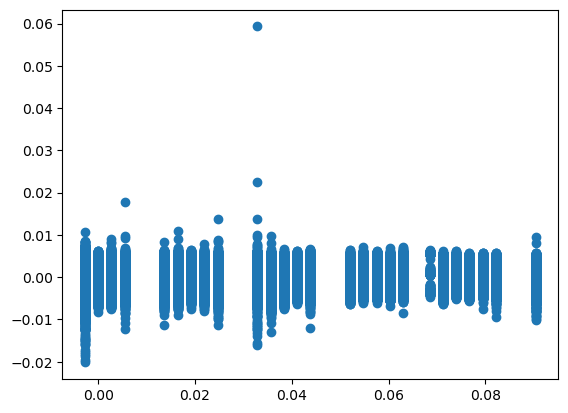

In [ ]:
plt.scatter(final_data_clean['time_to_expiry'], residuals)

In [63]:
# HETEROSKEDASTICITY TESTS

from statsmodels.stats.diagnostic import het_white

white_test = het_white(residuals, model.model.exog)
print(f"White's Test Statistic: {white_test[0]}, p-value: {white_test[1]}")

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"BP Test Statistic: {bp_test[0]}, p-value: {bp_test[1]}")


White's Test Statistic: 27693.997744808697, p-value: 0.0
BP Test Statistic: 20565.061644973448, p-value: 0.0


BP Test Statistic: 20565.061644973448, p-value: 0.0


In [22]:
from scipy import stats
# Test whether the residuals follow a t-distribution
t_statistic, p_value = stats.ttest_1samp(residuals, 0)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation of the t-test
if p_value < 0.05:
    print("The residuals do not follow a t-distribution (reject H0).")
else:
    print("The residuals follow a t-distribution (fail to reject H0).")

T-statistic: -1.2202267054936965e-12
P-value: 0.9999999999990263
The residuals follow a t-distribution (fail to reject H0).


In [91]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# # Simulating some heteroskedastic data
# np.random.seed(42)
# n = 100
# X = np.random.rand(n, 1) * 10  # Independent variable
# X = sm.add_constant(X)  # Add intercept
# beta = np.array([2, 0.5])
# sigma_sq = np.exp(0.3 * X[:, 1])  # Heteroskedastic variance function
# errors = np.random.normal(0, np.sqrt(sigma_sq))  # Non-constant variance
# y = X @ beta + errors  # Generate y values

# # Step 1: Run initial OLS
# ols_model = sm.OLS(y, X).fit()
# residuals = ols_model.resid

# Step 2: Estimate log(variance) using auxiliary regression
log_residuals_sq = np.log(residuals**2)
aux_model = sm.OLS(log_residuals_sq, X).fit()
gamma_hat = aux_model.params

# Step 3: Estimate h(x)
h_x = np.exp(X@gamma_hat)

# Step 4: Transform the data using weights
weights = 1 / np.sqrt(h_x)
y_transformed = y * weights
X_transformed = X * np.array(weights)[:, np.newaxis]
X_transformed = sm.add_constant(X_transformed)
# Step 5: Run WLS regression
wls_model = sm.OLS(y_transformed, X_transformed).fit()
print(wls_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     7253.
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:31:08   Log-Likelihood:            -5.6821e+05
No. Observations:              277963   AIC:                         1.136e+06
Df Residuals:                  277958   BIC:                         1.136e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6888      0.092     -7.

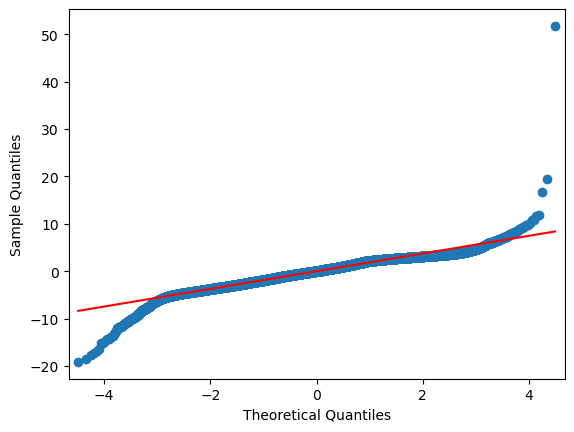

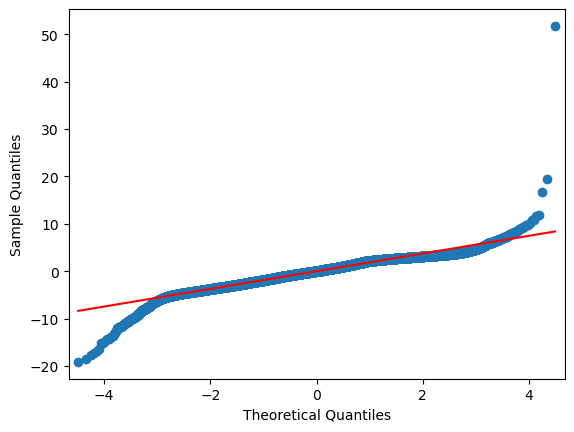

In [73]:
sm.qqplot(wls_model.resid, line = 's')

In [70]:
# HETEROSKEDASTICITY TESTS

from statsmodels.stats.diagnostic import het_white

white_test = het_white(wls_model.resid, wls_model.model.exog)
print(f"White's Test Statistic: {white_test[0]}, p-value: {white_test[1]}")

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(wls_model.resid, wls_model.model.exog)
print(f"BP Test Statistic: {bp_test[0]}, p-value: {bp_test[1]}")


White's Test Statistic: 11165.31977013028, p-value: 0.0
BP Test Statistic: 2215.154583232518, p-value: 0.0


In [94]:
def log_likelihood_normal(y, mu, sigma):
    """
    Computes the log-likelihood for a dataset where each observation has a given mean and standard deviation.
    
    Parameters:
        y (array-like): Observed values.
        mu (array-like): Mean values for each observation.
        sigma (array-like): Standard deviations for each observation.

    Returns:
        float: The log-likelihood value.
    """
    n = len(y)
    log_likelihood = np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - ((y - mu) ** 2) / (2 * sigma**2))
    return log_likelihood

In [95]:
log_likelihood_normal(y,(wls_model.fittedvalues/weights).values,
                      (np.std(wls_model.resid)/weights).values)

1299807.5780985402

In [97]:
log_likelihood_normal(y,model.fittedvalues.values,
                      np.array([np.std(model.resid)]*len(y)))

1284327.3790659586

In [83]:
(wls_model.fittedvalues/weights)

377      -0.004527
378      -0.004527
379      -0.004527
380      -0.004527
381      -0.004527
            ...   
279227   -0.005761
279228   -0.005761
279229   -0.005761
279230   -0.005761
279231   -0.005761
Length: 277963, dtype: float64

In [85]:
1/weights

377       0.001641
378       0.001641
379       0.001641
380       0.001641
381       0.001641
            ...   
279227    0.002313
279228    0.002313
279229    0.002313
279230    0.002313
279231    0.002313
Length: 277963, dtype: float64

In [84]:
wls_model.fittedvalues

377      -2.758305
378      -2.758305
379      -2.758305
380      -2.758305
381      -2.758305
            ...   
279227   -2.491145
279228   -2.491145
279229   -2.491145
279230   -2.491145
279231   -2.491145
Length: 277963, dtype: float64

In [79]:
np.std(wls_model.resid)/weights

377       0.003067
378       0.003067
379       0.003067
380       0.003067
381       0.003067
            ...   
279227    0.004322
279228    0.004322
279229    0.004322
279230    0.004322
279231    0.004322
Length: 277963, dtype: float64

                            OLS Regression Results                            
Dep. Variable:     log_returns_equity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.689
Date:                Thu, 20 Feb 2025   Prob (F-statistic):              0.167
Time:                        10:41:57   Log-Likelihood:             1.6881e+06
No. Observations:              275790   AIC:                        -3.376e+06
Df Residuals:                  275786   BIC:                        -3.376e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.32e-05   7.51e-06     -1.

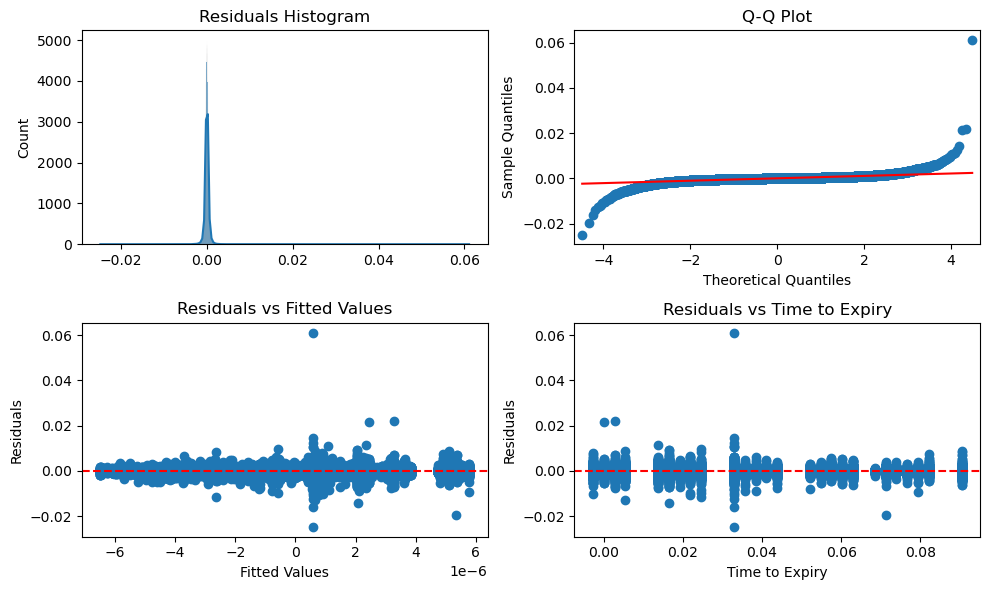

In [24]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson

# Assuming final_data is your DataFrame and it contains the necessary columns
# Drop rows with NaN values in the relevant columns
final_data_clean = final_data.dropna(subset=['log_returns_equity', col_dict['div_yield_col'], 
                                             col_dict['rfr_col'], 'time_to_expiry'])

# Define the independent variables (X) and the dependent variable (y)
X = final_data_clean[[col_dict['div_yield_col'], col_dict['rfr_col'], 'time_to_expiry']]
y = final_data_clean['log_returns_equity']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Conduct residual analysis
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')

plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.subplot(2, 2, 3)
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.subplot(2, 2, 4)
plt.scatter(final_data_clean['time_to_expiry'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time to Expiry')
plt.ylabel('Residuals')
plt.title('Residuals vs Time to Expiry')

plt.tight_layout()
plt.show()

# Conduct goodness of fit tests
# R-squared and Adjusted R-squared are already included in the model summary

# Test for autocorrelation in residuals using Durbin-Watson test
# dw_statistic = durbin_watson(residuals)
# print(f'Durbin-Watson statistic: {dw_statistic}')

In [75]:
import numpy as np

def log_likelihood_normal(y, mu, sigma):
    """
    Computes the log-likelihood for a dataset where each observation has a given mean and standard deviation.
    
    Parameters:
        y (array-like): Observed values.
        mu (array-like): Mean values for each observation.
        sigma (array-like): Standard deviations for each observation.

    Returns:
        float: The log-likelihood value.
    """
    n = len(y)
    log_likelihood = np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - ((y - mu) ** 2) / (2 * sigma**2))
    return log_likelihood

# Example dataset
np.random.seed(42)
n = 10  # Number of observations
y = np.random.normal(loc=5, scale=2, size=n)  # Random observations
mu = np.linspace(4, 6, n)  # Varying mean values
sigma = np.linspace(1, 3, n)  # Varying standard deviations

# Compute log-likelihood
log_L = log_likelihood_normal(y, mu, sigma)
print(f"Log-Likelihood: {log_L:.4f}")


Log-Likelihood: -21.5586


In [76]:
y

array([5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325,
       4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009])

In [77]:
mu

array([4.        , 4.22222222, 4.44444444, 4.66666667, 4.88888889,
       5.11111111, 5.33333333, 5.55555556, 5.77777778, 6.        ])

<Axes: xlabel='time_to_expiry', ylabel='log_returns'>

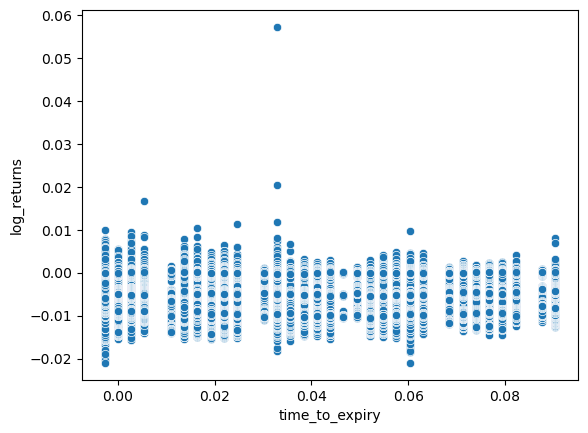

In [8]:
sns.scatterplot(near_month_data, x = 'time_to_expiry', y = 'log_returns')

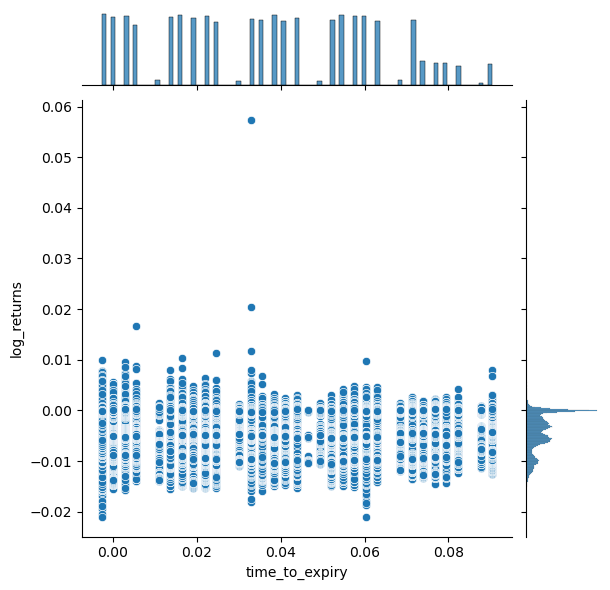

In [10]:
sns.jointplot(near_month_data, x = 'time_to_expiry', y = 'log_returns')

In [11]:
near_month_data[['time_to_expiry','log_returns']].corr()

,time_to_expiry,log_returns
time_to_expiry,1.000000,0.002372
log_returns,0.002372,1.000000


In [16]:
near_month_data.loc[near_month_data[col_dict['expiry_col']].dt.year == 2023][col_dict['date_col']].value_counts()

date
2022-12-30    375
2023-09-04    375
2023-08-14    375
2023-08-16    375
2023-08-17    375
             ... 
2023-08-25    365
2023-10-23    358
2023-08-31    350
2023-11-28    347
2023-11-12     60
Name: count, Length: 246, dtype: int64

#### LEARNING ARIMA MODELLING

In [44]:

ts = near_month_data.loc[pd.to_datetime(near_month_data[col_dict['date_col']])==pd.to_datetime('2023-08-17')].reset_index(drop=True)
ts.head()

,datetime,expiry_date,stock_code,exchange_code,product_type,right,strike_price,open,high,low,...,log_returns_equity,overnight_returns_equity,overnight_log_returns_equity,intraday_returns_equity,intraday_log_returns_equity,time_to_expiry,open_theoretical,close_theoretical,open_price_diff,close_price_diff
0,2023-08-17 09:15:00,2023-08-31,NIFTY,NFO,Futures,Others,0,19435.40,19448.75,19435.30,...,-0.000491,0.000000,0.000000,-0.000491,-0.000491,0.035616,NaN,NaN,NaN,NaN
1,2023-08-17 09:16:00,2023-08-31,NIFTY,NFO,Futures,Others,0,19445.50,19456.75,19440.10,...,0.000237,-0.000023,-0.000023,0.000260,0.000260,0.035616,NaN,NaN,NaN,NaN
2,2023-08-17 09:17:00,2023-08-31,NIFTY,NFO,Futures,Others,0,19454.95,19463.10,19454.95,...,0.000432,0.000121,0.000121,0.000311,0.000311,0.035616,NaN,NaN,NaN,NaN
3,2023-08-17 09:18:00,2023-08-31,NIFTY,NFO,Futures,Others,0,19461.90,19462.35,19455.00,...,-0.000416,0.000021,0.000021,-0.000437,-0.000437,0.035616,NaN,NaN,NaN,NaN
4,2023-08-17 09:19:00,2023-08-31,NIFTY,NFO,Futures,Others,0,19453.40,19456.90,19451.00,...,-0.000028,-0.000059,-0.000059,0.000031,0.000031,0.035616,NaN,NaN,NaN,NaN


In [45]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """
    Perform the Augmented Dickey-Fuller test to check for stationarity of a time series.
    
    Parameters:
    timeseries (pd.Series): The time series to test.
    
    Returns:
    dict: A dictionary containing the test statistic, p-value, and critical values.
    """
    # Perform the ADF test
    adf_result = adfuller(timeseries, autolag='AIC')
    
    # Extract the test statistic, p-value, and critical values
    test_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    
    # Create a dictionary to store the results
    result = {
        'Test Statistic': test_statistic,
        'p-value': p_value,
        'Critical Values': critical_values
    }
    
    return result
stationary_check_cols = [col_dict['close_price_col'], f"{col_dict['close_price_col']}_equity", 'log_returns', 'log_returns_equity']

for column in stationary_check_cols:
    stationarity_result = test_stationarity(ts[column])
    # Interpretation of the ADF test
    if stationarity_result['p-value'] < 0.05:
        print(f"{column} time series is stationary (reject H0).")
    else:
        print(f"{column} time series is not stationary (fail to reject H0).")

close time series is not stationary (fail to reject H0).
close_equity time series is not stationary (fail to reject H0).
log_returns time series is stationary (reject H0).
log_returns_equity time series is stationary (reject H0).


In [26]:
pd.Series([1,2,3,4,5,6,7,87,8,9]).diff(None)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
diff_range = 10
stationary_check_cols = ['log_returns', 'log_returns_equity']
for column in stationary_check_cols:
    diff_ts = ts[column]
    for diff in range(diff_range):
        print(f"ADF Test for {diff} differencing:")
        if diff > 0:
            diff_ts = diff_ts.diff(1).dropna()
        stationarity_result = test_stationarity(diff_ts)
        # Interpretation of the ADF test
        if stationarity_result['p-value'] < 0.05:
            print(f"{column} time series is stationary after {diff} differencing (reject H0).")
        else:
            print(f"{column} time series is not stationary after {diff} differencing (fail to reject H0).")
        print(f"Variance of differenced {column} after {diff} differencing: {diff_ts.var()}\n")

ADF Test for 0 differencing:
log_returns time series is stationary after 0 differencing (reject H0).
Variance of differenced log_returns after 0 differencing: 1.560524924809908e-05

ADF Test for 1 differencing:
log_returns time series is stationary after 1 differencing (reject H0).
Variance of differenced log_returns after 1 differencing: 3.534378638332634e-05

ADF Test for 2 differencing:
log_returns time series is stationary after 2 differencing (reject H0).
Variance of differenced log_returns after 2 differencing: 0.00010377412058575674

ADF Test for 3 differencing:
log_returns time series is stationary after 3 differencing (reject H0).
Variance of differenced log_returns after 3 differencing: 0.0003252002513053602

ADF Test for 4 differencing:
log_returns time series is stationary after 4 differencing (reject H0).
Variance of differenced log_returns after 4 differencing: 0.001060346199454942

ADF Test for 5 differencing:
log_returns time series is stationary after 5 differencing (r

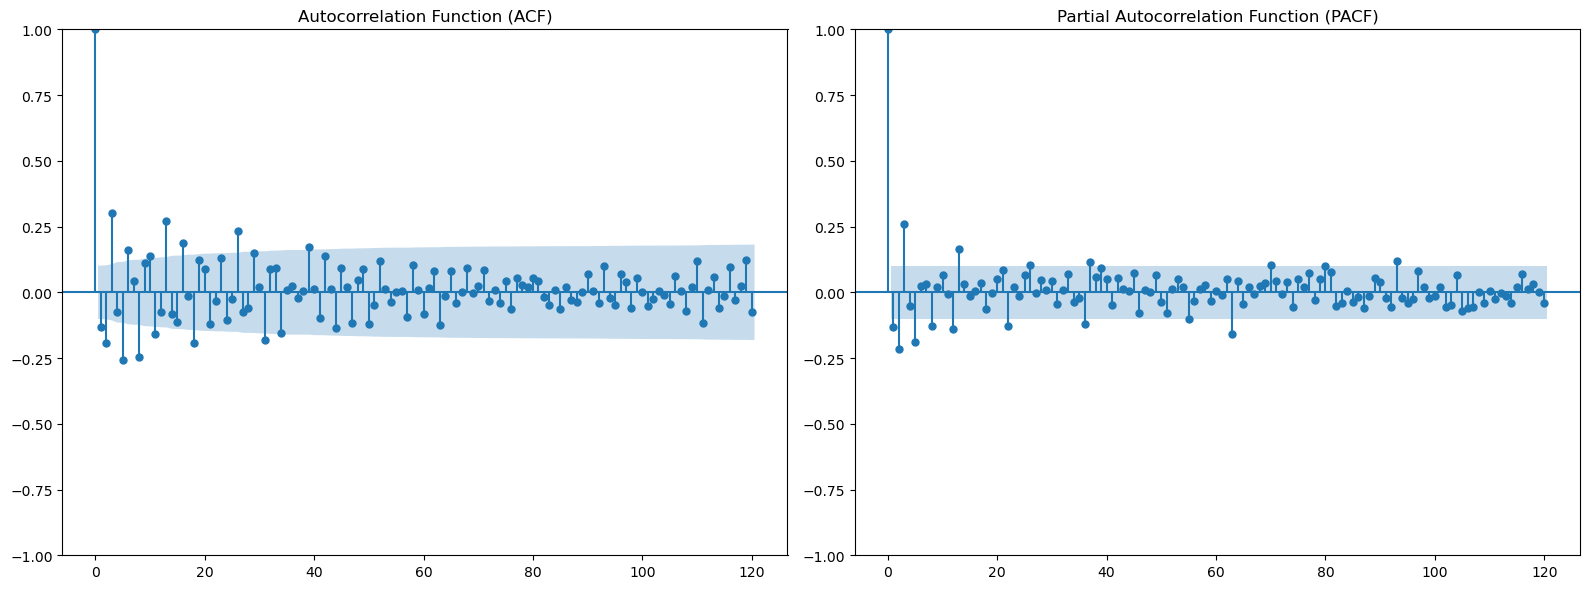

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(timeseries, lags=40, alpha=0.05):
    """
    Plot ACF and PACF with cutoff values at a 0.05 confidence interval.
    
    Parameters:
    timeseries (pd.Series): The time series to plot.
    lags (int): Number of lags to include in the plots (default is 40).
    alpha (float): Significance level for the confidence interval (default is 0.05).
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot ACF
    plot_acf(timeseries, lags=lags, alpha=alpha, ax=axes[0])
    axes[0].set_title('Autocorrelation Function (ACF)')
    
    # Plot PACF
    plot_pacf(timeseries, lags=lags, alpha=alpha, ax=axes[1])
    axes[1].set_title('Partial Autocorrelation Function (PACF)')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming final_data is your DataFrame and it contains the 'log_returns' column
log_returns_series = ts['log_returns'].dropna()

plot_acf_pacf(log_returns_series, lags=120, alpha=0.05)

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Assuming final_data is your DataFrame and it contains the 'log_returns' column
log_returns_series = ts['log_returns'].dropna()

# Split the data into training and testing sets
train_size = int(len(log_returns_series) * 0.8)
train, test = log_returns_series[:train_size], log_returns_series[train_size:]


arima_order = (30, 0, 0)
# Fit the initial ARIMA model to identify significant lags
initial_model = ARIMA(train, order=arima_order)
initial_model_fit = initial_model.fit()

# Print the summary of the initial ARIMA model
print(initial_model_fit.summary())

# Create a new model including only the significant lags
# Note: SARIMAX allows specifying the AR and MA terms using the `ar_order` and `ma_order` parameters
ar_lags = [i for i in range(1, arima_order[0]+1) if f'ar.L{i}' in initial_model_fit.params and initial_model_fit.pvalues[f'ar.L{i}'] < 0.05]
ma_lags = [i for i in range(1, arima_order[2]+1) if f'ma.L{i}' in initial_model_fit.params and initial_model_fit.pvalues[f'ma.L{i}'] < 0.05]

# Fit the new ARIMA model with significant lags
new_model = ARIMA(train, order=(ar_lags,arima_order[1],ma_lags))
new_model_fit = new_model.fit()
print(new_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                  300
Model:                ARIMA(30, 0, 0)   Log Likelihood                1284.354
Date:                Thu, 27 Feb 2025   AIC                          -2504.709
Time:                        19:49:56   BIC                          -2386.188
Sample:                             0   HQIC                         -2457.277
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.000    -39.354      0.000      -0.008      -0.007
ar.L1         -0.0775      0.073     -1.064      0.287      -0.220       0.065
ar.L2         -0.1001      0.071     -1.410      0.1

In [104]:
ar_lags

[3, 4, 5, 12, 13, 33, 45]

In [120]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Assuming final_data is your DataFrame and it contains the 'log_returns' column
log_returns_series = ts['log_returns'].dropna()

# Split the data into training and testing sets
train_size = int(len(log_returns_series) * 0.8)
train, test = log_returns_series[:train_size], log_returns_series[train_size:]

# Fit the ARIMA model to the training data
arima_order = (30, 0, 0)  # Example order, you may need to tune this
model = ARIMA(train, order=arima_order)
model_fit = model.fit()

# Print the summary of the ARIMA model
print(model_fit.summary())

# Test whether the residuals have zero mean
mean_t_statistic, mean_p_value = stats.ttest_1samp(model_fit.resid, 0)
print(f'Mean T-statistic: {mean_t_statistic}')
print(f'Mean P-value: {mean_p_value}')

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                  300
Model:                ARIMA(30, 0, 0)   Log Likelihood                1284.354
Date:                Thu, 27 Feb 2025   AIC                          -2504.709
Time:                        19:40:13   BIC                          -2386.188
Sample:                             0   HQIC                         -2457.277
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.000    -39.354      0.000      -0.008      -0.007
ar.L1         -0.0775      0.073     -1.064      0.287      -0.220       0.065
ar.L2         -0.1001      0.071     -1.410      0.1

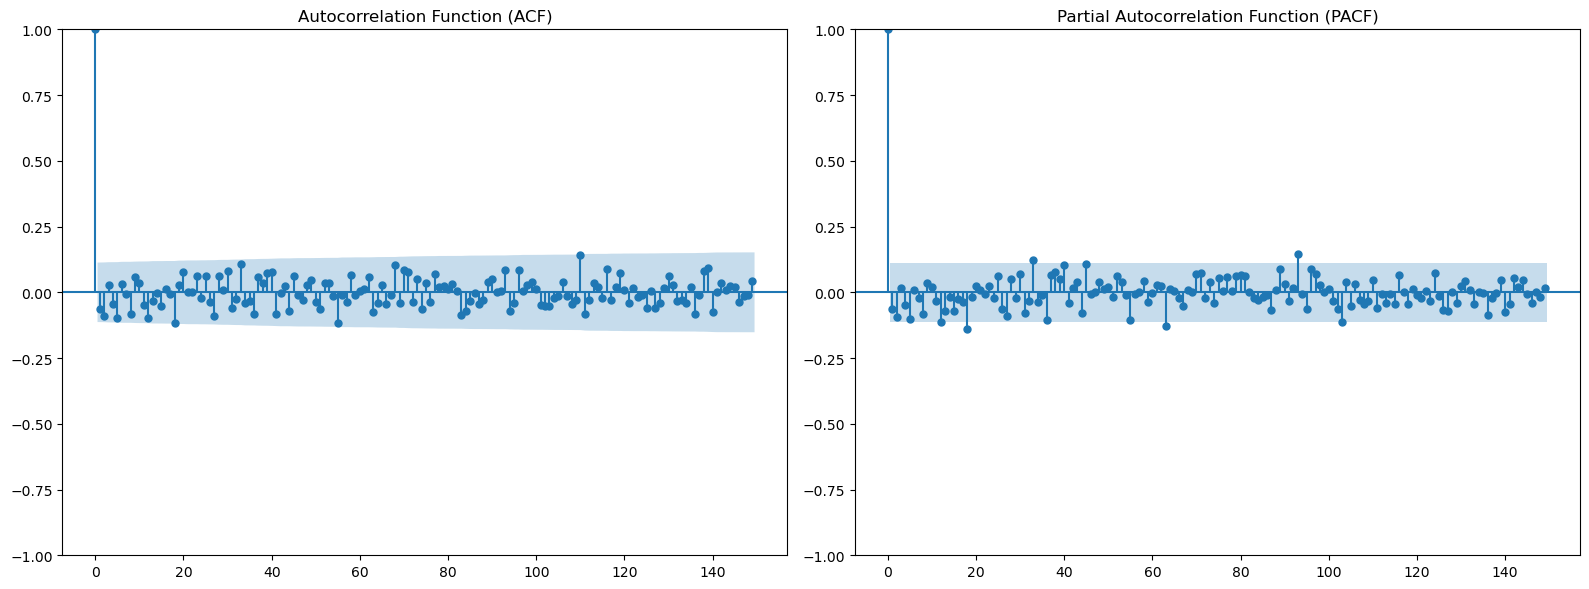

In [129]:
plot_acf_pacf(new_model_fit.resid, lags=149, alpha=0.05)

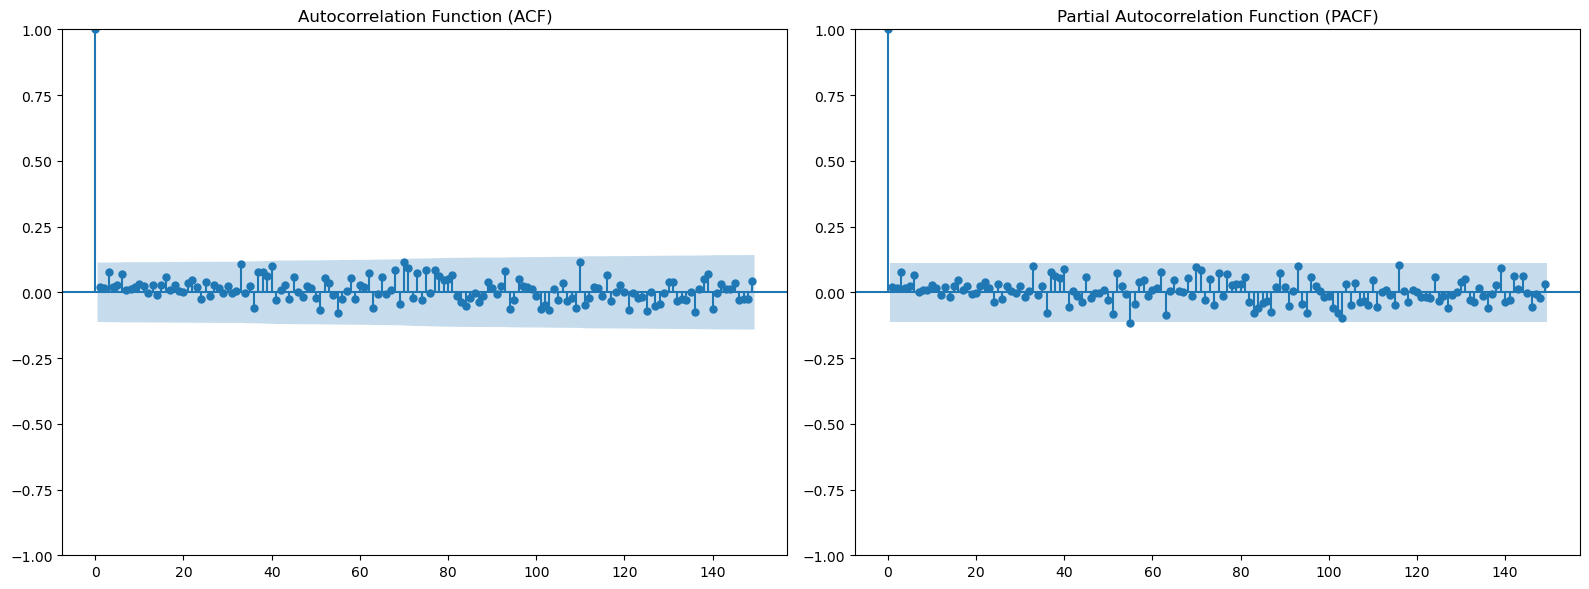

In [121]:
plot_acf_pacf(model_fit.resid, lags=149, alpha=0.05)

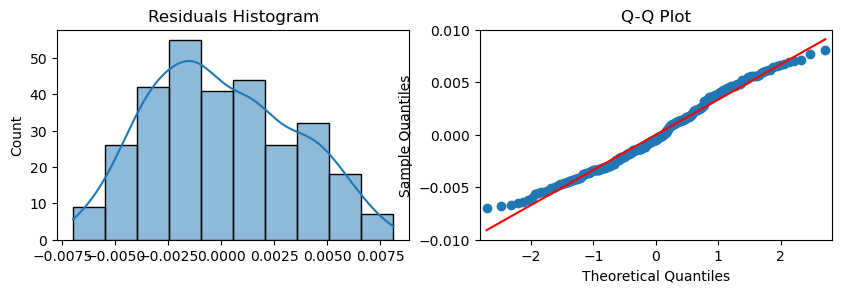

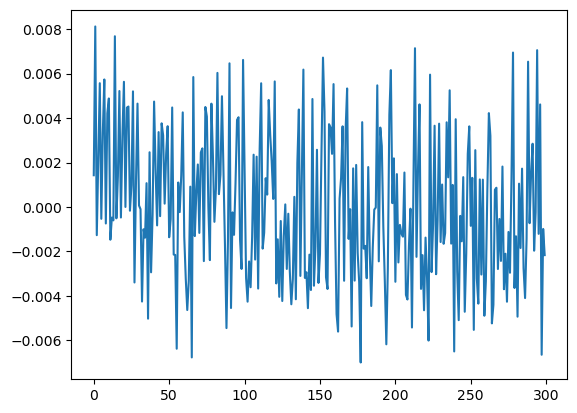

In [122]:
import statsmodels.api as sm
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')

plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')
plt.show()

plt.plot(residuals)
plt.show()

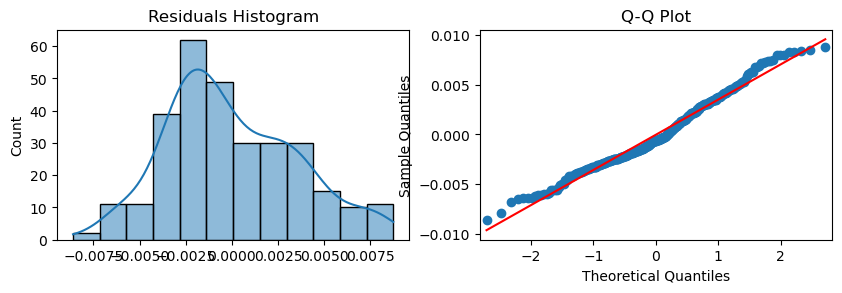

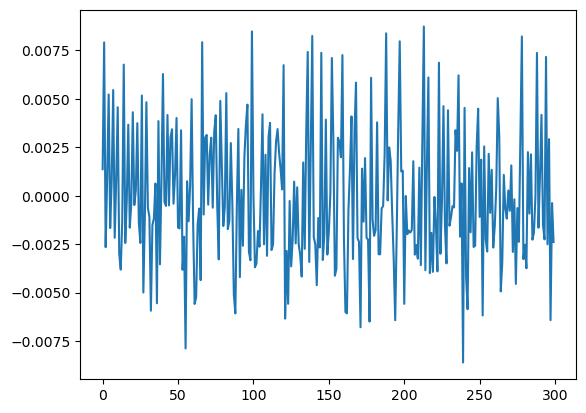

In [131]:
import statsmodels.api as sm
residuals = new_model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')

plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')
plt.show()

plt.plot(residuals)
plt.show()

In [130]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Conduct Ljung-Box test on residuals
ljung_box_test = acorr_ljungbox(new_model_fit.resid, lags = [10,20,30,60],#list(range(1,31)), 
                                return_df=True, model_df=6, boxpierce=True)
print("Ljung-Box test results:")
ljung_box_test

Ljung-Box test results:


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,11.370371,0.022702,11.107292,0.025384
20,23.045378,0.059535,22.089516,0.076794
30,32.264822,0.120560,30.427129,0.170996
60,63.691148,0.172267,57.115380,0.360133


In [124]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Conduct Ljung-Box test on residuals
ljung_box_test = acorr_ljungbox(model_fit.resid, lags = [10,20,30,60],#list(range(1,31)), 
                                return_df=True, model_df=6, boxpierce=True)
print("Ljung-Box test results:")
ljung_box_test

Ljung-Box test results:


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,4.406436,0.353786,4.305957,0.366180
20,6.371418,0.956244,6.157834,0.962355
30,8.950544,0.997699,8.514655,0.998464
60,32.902122,0.989603,28.885097,0.997996


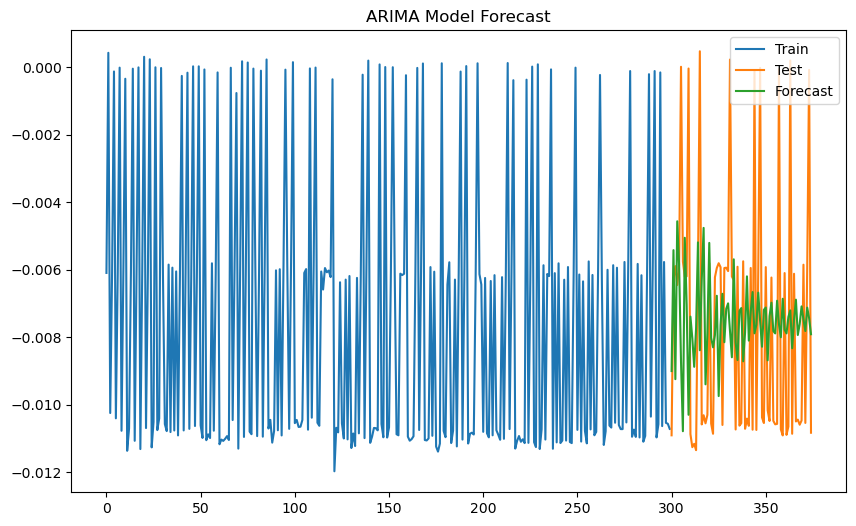

Mean Squared Error: 1.4577096866073584e-05


In [125]:
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

# Calculate the mean squared error of the forecast
mse = np.mean((forecast - test) ** 2)
print(f'Mean Squared Error: {mse}')

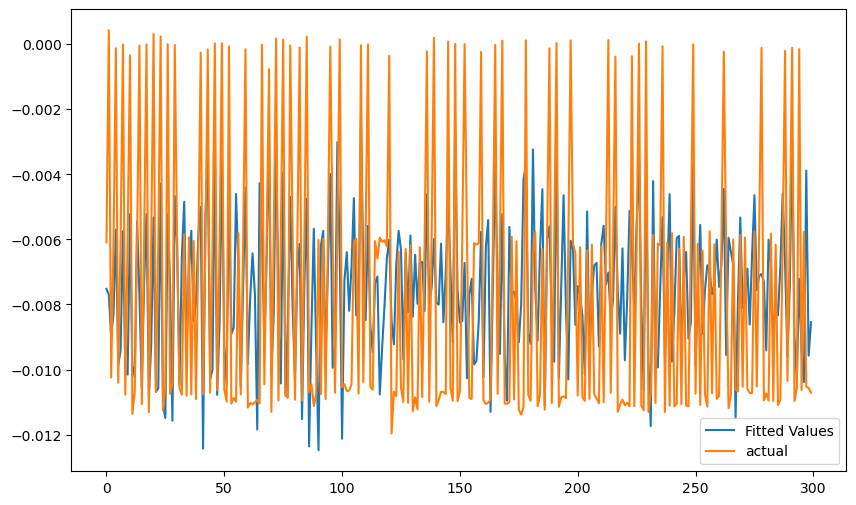

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(model_fit.fittedvalues, label='Fitted Values')
plt.plot(train, label = 'actual')
plt.legend()


Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
      dtype='int64', length=300)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
      dtype='int64', name='minute', length=300)


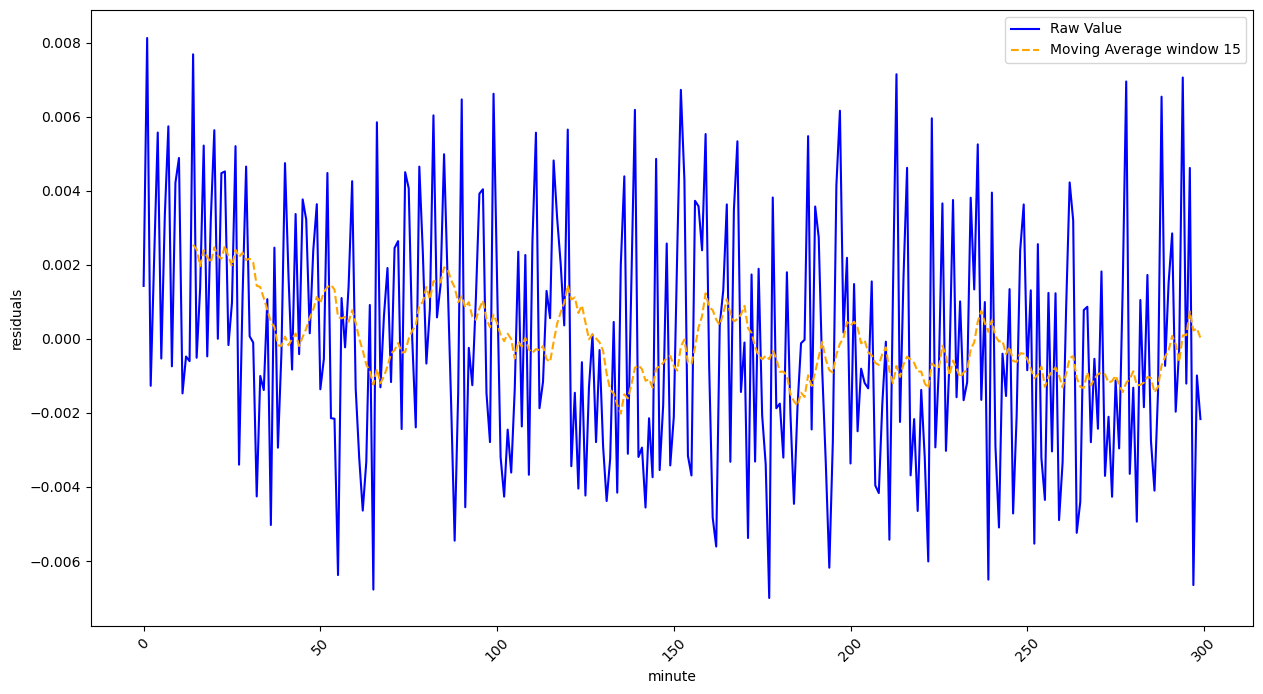

In [127]:
plot_moving_average(pd.DataFrame({'residuals':residuals, 'minute':[t for t in range(len(residuals))] }), 
                    col_dict, plot_col_name='residuals', window = 15, time_col = 'minute')

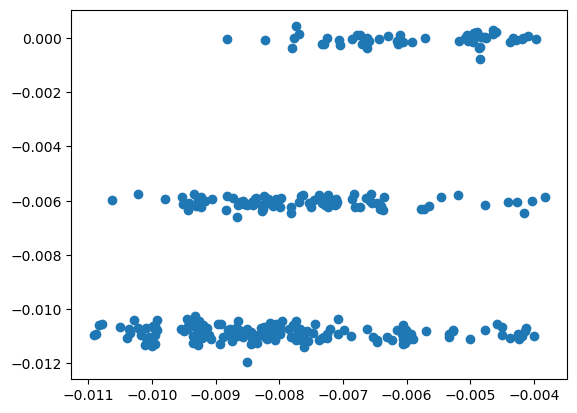

In [67]:
plt.scatter(model_fit.fittedvalues, train)